# Practica 2_Metodo_Del_Gradiente3D


Valores de x, y y z en cada iteración:
   Iteración       x     y  z (f(x, y))
0          0 -10.000  10.0   130.000000
1          1  -8.000   9.7    93.100000
2          2  -6.400   9.4    69.160000
3          3  -5.120   9.1    53.514400
4          4  -4.096   8.8    43.177216
    Iteración         x    y  z (f(x, y))
30         30 -0.012379  1.0     3.000153
31         31 -0.009904  0.7     2.100098
32         32 -0.007923  0.4     1.200063
33         33 -0.006338  0.1     0.300040
34         34 -0.005071 -0.2    -0.599974


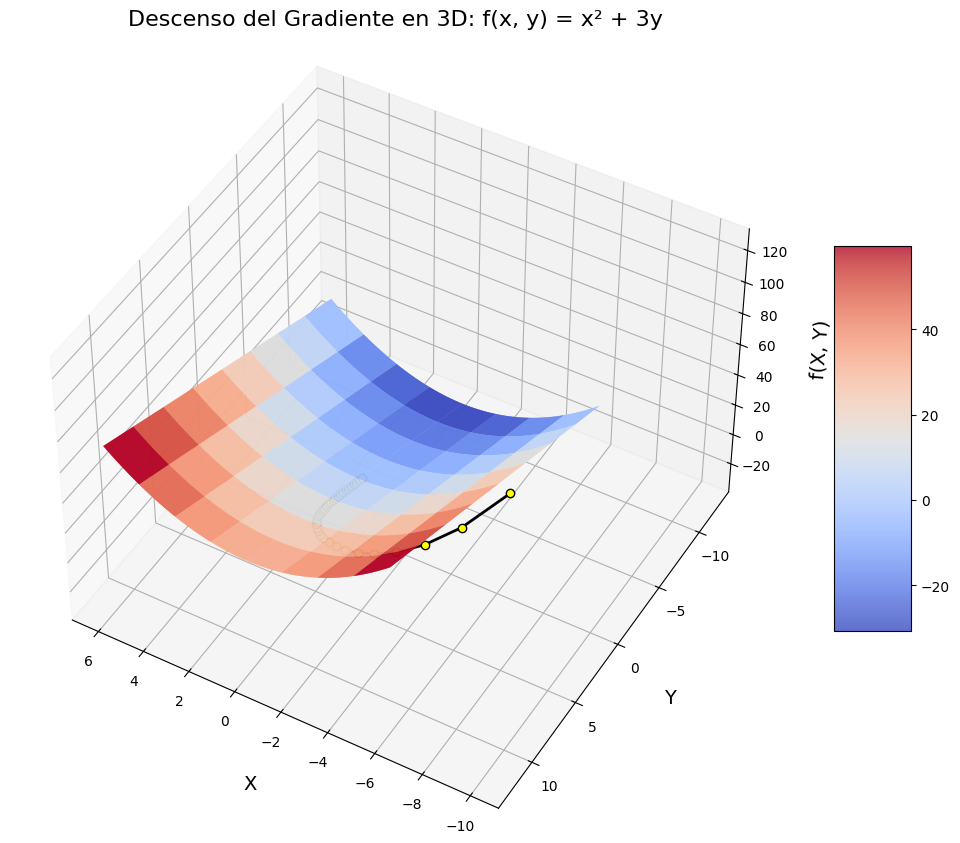

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Definir la función y su gradiente
def f(x, y):
    return x**2 + 3*y

def gradient(x, y):
    df_dx = 2 * x  # Derivada parcial con respecto a x
    df_dy = 3      # Derivada parcial con respecto a y
    return np.array([df_dx, df_dy])

# Parámetros del descenso del gradiente
alpha = 0.1  # Tasa de aprendizaje
iterations = 34   # Número de iteraciones
initial_point = np.array([-10, 10])  # Punto inicial (x0, y0)

# Listas para almacenar la trayectoria
x_vals = [initial_point[0]]
y_vals = [initial_point[1]]
f_vals = [f(initial_point[0], initial_point[1])]

# Descenso del gradiente
point = initial_point
for i in range(iterations):
    grad = gradient(point[0], point[1])
    point = point - alpha * grad
    
    # Guardar valores
    x_vals.append(point[0])
    y_vals.append(point[1])
    f_vals.append(f(point[0], point[1]))

# Crear un DataFrame para almacenar los valores de x, y, y z en cada iteración
data = {
    'Iteración': list(range(iterations + 1)),
    'x': x_vals,
    'y': y_vals,
    'z (f(x, y))': f_vals
}

df = pd.DataFrame(data)

# Mostrar las primeras y últimas filas
print("Valores de x, y y z en cada iteración:")
print(df.head())  # Primeras filas
print(df.tail())  # Últimas filas

# Crear malla para la gráfica 3D de la función
x = np.linspace(-6, 6, 400)
y = np.linspace(-12, 12, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Superficie de la función con más precisión y una paleta de colores más suave
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8, edgecolor='none', rstride=50, cstride=50)

# Trayectoria del descenso del gradiente con mayor detalle en los puntos
ax.plot(x_vals, y_vals, f_vals, color='black', marker='o', markersize=6, lw=2, label='Trayectoria del descenso', markerfacecolor='yellow', markeredgecolor='black')

# Personalización de la gráfica
ax.set_xlabel('X', labelpad=15, fontsize=14)
ax.set_ylabel('Y', labelpad=15, fontsize=14)
ax.set_zlabel('f(X, Y)', labelpad=15, fontsize=14)
ax.set_title('Descenso del Gradiente en 3D: f(x, y) = x² + 3y', fontsize=16, pad=20)

# Ajustar ángulo de la vista para una mejor perspectiva
ax.view_init(elev=45, azim=120)

# Añadir una leyenda y un color bar para la función
mappable = ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8, edgecolor='none', rstride=50, cstride=50)
fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)

# Mostrar gráfica mejorada
plt.show()

